В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

# 1. Ответим на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


**Построим точечный график**

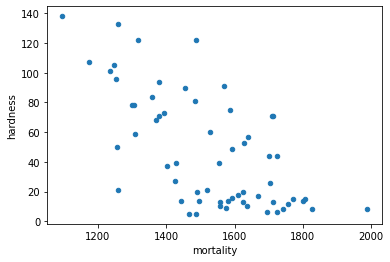

In [ ]:
# Визуализируем взаимосвязь на графике

df.plot(kind='scatter', x='mortality', y='hardness')

*На графике видна слабая обратная линейная взаимосвязь.*

**Рассчитаем коэффициенты корреляции Пирсона и Спирмена**

In [ ]:
# коэффициент корреляции Пирсона

df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


*Отрицательный коэффициент подтвердил обратную взаимосвязь на графике.*

In [ ]:
# коэффициент корреляции Спирмана

df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


*Данный коэффициент тоже отрицательный и не значительно отличается от коэффициента Пирсона.*

**Построим модель линейной регрессии**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['hardness']]
y = df['mortality']

In [ ]:
# разеделим данные на тренировочную и тестовую группы

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
X_train.shape

(42, 1)

In [ ]:
X_test.shape

(19, 1)

In [ ]:
# обучим модель на тренировочной группе

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.65672017])

In [ ]:
model.intercept_

1688.066270653473

In [ ]:
# прогноз
y_pred = model.predict(X_test)
y_pred

array([1666.12594964, 1640.52890845, 1669.78266981, 1413.81225794,
       1640.52890845, 1629.55874794, 1201.72248811, 1666.12594964,
       1318.73753354, 1358.9614554 , 1355.30473523, 1640.52890845,
       1636.87218828, 1636.87218828, 1552.76762438, 1391.87193693,
       1344.33457472, 1421.12569828, 1428.43913862])

**Рассчитаем коэффициент детерминации**

In [ ]:
# коэффициент детерминации
model.score(X_test, y_test)

0.30602504827717636

*Коэффициент детерминации низкий, на основании только данного признака некорректно делать прогноз.*

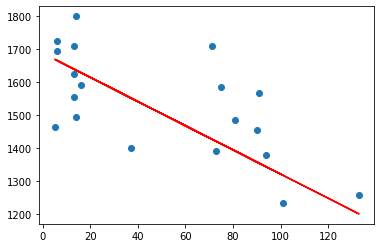

In [ ]:
# Линия прогноза

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')


**Вывести график остатков**

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_const = sm.add_constant(X_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     32.59
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.21e-06
Time:                        10:55:45   Log-Likelihood:                -269.34
No. Observations:                  42   AIC:                             542.7
Df Residuals:                      40   BIC:                             546.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.0663     37.580     44.919      0.0

Text(0, 0.5, 'Остатки')

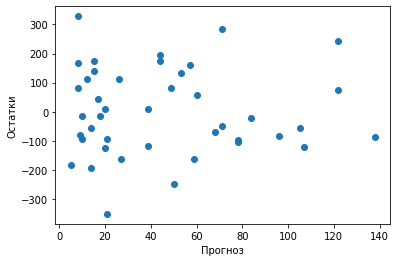

In [ ]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

(array([1., 0., 0., 1., 2., 2., 3., 7., 4., 3., 2., 1., 4., 2., 2., 4., 1.,
        1., 1., 1.]),
 array([-351.27514709, -317.3020152 , -283.32888331, -249.35575142,
        -215.38261953, -181.40948765, -147.43635576, -113.46322387,
         -79.49009198,  -45.51696009,  -11.5438282 ,   22.42930369,
          56.40243558,   90.37556747,  124.34869936,  158.32183125,
         192.29496314,  226.26809503,  260.24122692,  294.21435881,
         328.1874907 ]),
 <a list of 20 Patch objects>)

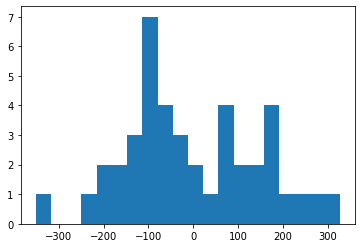

In [ ]:
plt.hist(results.resid, bins=20)

**Есть ли связь между жёсткостью воды и средней годовой смертностью?**

**Связь между признаками есть - обратная линейная, но слабая.**

**Делать прогнозы смертности на основании жесткости воды некорректно, так как коэффициент детерминации низкий (0.306), чтобы делать хорошие прогнозы.**

# 2.Ответим на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделим данные на 2 группы
Повторим аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
df_south = df[df['location']== 'South']
print(df_south.head())
print('-----------------------------------------------------')
print(df_south.info())

    Unnamed: 0 location         town  mortality  hardness
0            1    South         Bath       1247       105
2            3    South   Birmingham       1466         5
7            8    South  Bournemouth       1299        78
9           10    South     Brighton       1359        84
10          11    South      Bristol       1392        73
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB
None


In [ ]:
df_north = df[df['location']== 'North']
print(df_north.head())
print('-----------------------------------------------------')
print(df_north.info())

   Unnamed: 0 location        town  mortality  hardness
1           2    North  Birkenhead       1668        17
3           4    North   Blackburn       1800        14
4           5    North   Blackpool       1609        18
5           6    North      Bolton       1558        10
6           7    North      Bootle       1807        15
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB
None


**Построим точечный график**

Text(0.5, 1.0, 'График для южных городов')

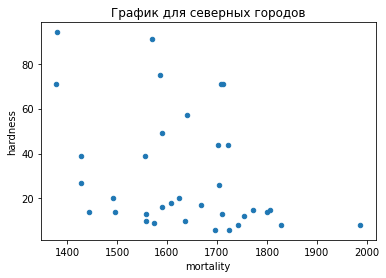

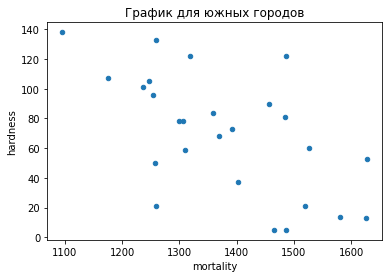

In [ ]:
# Визуализируем взаимосвязь на графике

df_north.plot(kind='scatter', x='mortality', y='hardness')
plt.title('График для северных городов')
df_south.plot(kind='scatter', x='mortality', y='hardness')
plt.title('График для южных городов')

*На графиках видна обратная линейная взаимосвязь, для южных городов - умеренная, для северных - очень слабая*.

**Рассчитаем коэффициенты корреляции Пирсона и Спирмена**

In [ ]:
# коэффициент корреляции Пирсона для северных городов

df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# коэффициент корреляции Пирсона для южных городов

df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
# коэффициент корреляции Спирмана для северных городов

df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
# коэффициент корреляции Спирмана для южных городов

df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


*Коэффициент корреляции Пирсона и Спирмена для южный городов почти в два раза больше, то есть связь сильнее.*

**Построим модель линейной регрессии**

для северных городов

In [ ]:
Xn = df_north[['hardness']]
yn = df_north['mortality']

In [ ]:
# разеделим данные на тренировочную и тестовую группы

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.30, random_state=1)

In [ ]:
# обучим модель на тренировочной группе

model_n = LinearRegression()
model_n.fit(Xn_train, yn_train)

LinearRegression()

In [ ]:
yn_pred = model_n.predict(Xn_test)

print(model_n.coef_)
print(model_n.intercept_)
print(yn_pred)


[-3.32783181]
1702.3658062157222
[1399.53311152 1555.94120658 1669.08748812 1466.08974771 1635.80917002
 1452.77842048 1682.39881536 1655.77616088 1675.74315174 1466.08974771
 1675.74315174]


для южных городов

In [ ]:
Xs = df_south[['hardness']]
ys = df_south['mortality']

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.30, random_state=1)

In [ ]:
model_s = LinearRegression()
model_s.fit(Xs_train, ys_train)

LinearRegression()

In [ ]:
ys_pred = model_s.predict(Xs_test)

print(model_s.coef_)
print(model_s.intercept_)
print(ys_pred)

[-1.87359315]
1520.492357120051
[1331.25944883 1409.95036119 1351.8689735  1363.11053241 1408.07676804
 1261.93650223 1393.08802283 1426.81269955]


**Рассчитаем коэффициент детерминации**

In [ ]:
# коэффициент детерминации для северных городов
model_n.score(Xn_test, yn_test)

-0.8059562565000893

In [ ]:
# коэффициент детерминации для южных городов
model_s.score(Xs_test, ys_test)

0.19850621188305384

*Коэффициент детерминации для северных городов отрицательный - модель не работает(возможно очень мало данных). Для южных городов - положительный, но значение низкое, модель не будет делать хорошие прогнозы.*

Text(0.5, 1.0, 'Для северных городов')

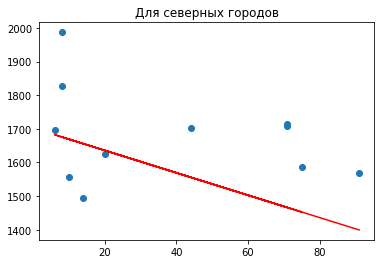

In [ ]:
# Линия прогноза

plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test, yn_pred, c='r')
plt.title('Для северных городов')

Text(0.5, 1.0, 'Для южных городов')

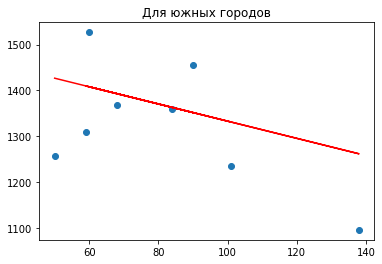

In [ ]:
plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, ys_pred, c='r')
plt.title('Для южных городов')

**Выведем график остатков**

для северных городов

In [ ]:

Xn_const = sm.add_constant(Xn_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model_n = sm.OLS(yn_train, Xn_const)
results_n = model_n.fit()
print(results_n.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     9.695
Date:                Sat, 28 Jan 2023   Prob (F-statistic):            0.00506
Time:                        11:43:59   Log-Likelihood:                -146.70
No. Observations:                  24   AIC:                             297.4
Df Residuals:                      22   BIC:                             299.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1702.3658     37.013     45.994      0.0

для южных городов

In [ ]:
Xs_const = sm.add_constant(Xs_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model_s = sm.OLS(ys_train, Xs_const)
results_s = model_s.fit()
print(results_s.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     8.582
Date:                Sat, 28 Jan 2023   Prob (F-statistic):            0.00982
Time:                        11:46:56   Log-Likelihood:                -110.18
No. Observations:                  18   AIC:                             224.4
Df Residuals:                      16   BIC:                             226.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1520.4924     49.696     30.596      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


График остатков

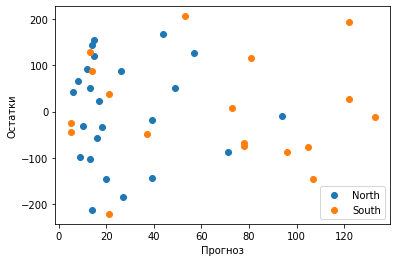

In [ ]:

plt.scatter(x=Xn_const.iloc[:, 1], y=results_n.resid, label = 'North')
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

plt.scatter(x=Xs_const.iloc[:, 1], y=results_s.resid, label = 'South')

plt.legend(loc='best')

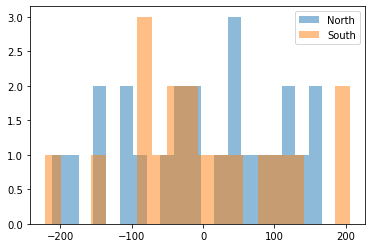

In [ ]:
plt.hist(results_n.resid, bins=20, alpha = 0.5,label = 'North')
plt.hist(results_s.resid, bins=20,  alpha = 0.5,label = 'South')
plt.legend(loc='best')


**Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

Взаимосвязь и для северных, и для южных городов обратная линейная, только для южных - сильнее в два раза.

Для северных городов модель не работает, возможно из-за того, что очень мало данных, линейная связь слабо выражена, но есть (коэф. Пирсона 0.369).

Для южных городов модель работает, но коэффициента детерминации (0.199) очень низкий, чтобы делать хорошие прогнозы.